In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_excel("DATAREAL.xlsx") # put your data set here
df.head()
# df = df.drop('Unnamed: 8', axis=1)
# df = df.drop('Unnamed: 16', axis=1)
# df = df.drop('Unnamed: 19', axis=1)
# df = df.drop('Unnamed: 25', axis=1)
# df = df.drop('Unnamed: 33', axis=1)
# df = df.drop('Unnamed: 41', axis=1)
# df = df.drop('Unnamed: 49', axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'DATAREAL.xlsx'

In [66]:
df.head()

,Player,Personal Best,Bianco 2,Bianco 3,Bianco 4,Bianco 5,Bianco 6,Bianco 7,Ricco 1,Ricco 2,...,Noki 7,Pianta 1,Pianta 2,Pianta 3,Pianta 4,Pianta 5,Pianta 6,Pianta 7,Airstrip,Corona Mountain
0,BASELINE,1:20:00,1:19.21,37.12,42.87,2:14.10,1:09.82,16.00,50.09,16.74,...,15.59,42.34,12.61,29.52,44.20,50.16,2:17.43,17.97,42.76,1:16.18
1,Fech,1:14:56,1:18.54,36.57,42.01,2:10.06,1:09.15,15.96,49.45,16.08,...,15.46,41.43,12.41,28.61,43.46,49.47,2:20.23,17.40,42.82,1:14.61
2,Anonymous 3,1:14:22,1:18.18,36.54,41.76,2:13.99,1:08.33,15.98,49.60,16.38,...,15.50,40.70,12.41,28.28,43.70,48.06,2:18.06,17.77,42.54,1:13.84
3,Anonymous 4,1:13:17,1:18.28,36.57,42.16,2:15.59,1:08.47,15.96,49.97,16.31,...,15.63,40.47,12.51,29.25,43.93,48.57,2:18.43,17.93,42.66,1:14.84
4,Rimato13,1:13:48,1:18.57,37.03,42.24,2:12.40,1:08.74,16.01,49.95,16.51,...,15.63,41.50,12.57,29.14,43.77,48.05,2:18.86,17.87,42.89,1:15.43


In [68]:
def time_to_seconds(t):
    if pd.isna(t):
        return np.nan

    # Convert to string (some might be numbers)
    t = str(t).strip()

    # Split by colon
    parts = t.split(':')

    try:
        if len(parts) == 3:
            h, m, s = parts
            return int(h) * 3600 + int(m) * 60 + float(s)
        elif len(parts) == 2:
            m, s = parts
            return int(m) * 60 + float(s)
        else:
            # Only seconds (like "59.82")
            return float(t)
    except ValueError:
        # In case there's something weird like an empty string or typo
        return np.nan


In [69]:

#plt.bar(df['Player'], df['Bianco 4'])

#plt.xlabel('Time (minutes)')
#plt.ylabel('Task')
#plt.title('Time Spent per Task')

#plt.show()

In [70]:
#Convert everything to seconds
level_keywords = [
    "Bianco", "Ricco", "Gelato", "Gelato", 
    "Pinna", "Sirena", "Pianta", "Noki", "Corona", "Airstrip"
]

il_cols = [col for col in df.columns if any(keyword in col for keyword in level_keywords)]
for col in il_cols:
    df[col] = df[col].apply(time_to_seconds)
df["Any%"] = df["Personal Best"].apply(time_to_seconds)

In [71]:
#Fill in missing values
df[il_cols] = df[il_cols].fillna(df[il_cols].median())

In [72]:
#add all ILs and show results
df["SumOfBests"] = df[il_cols].sum(axis=1)
df = df[df["SumOfBests"] <= 5000]
df[["Player", "SumOfBests", "Any%"]].head()
df[["Player", "Bianco 2", "Ricco 1", "SumOfBests","Any%"]].head()


,Player,Bianco 2,Ricco 1,SumOfBests,Any%
0,BASELINE,79.21,50.09,2176.32,4800.0
1,Fech,78.54,49.45,2143.78,4496.0
2,Anonymous 3,78.18,49.60,2153.95,4462.0
3,Anonymous 4,78.28,49.97,2157.94,4397.0
4,Rimato13,78.57,49.95,2168.78,4428.0


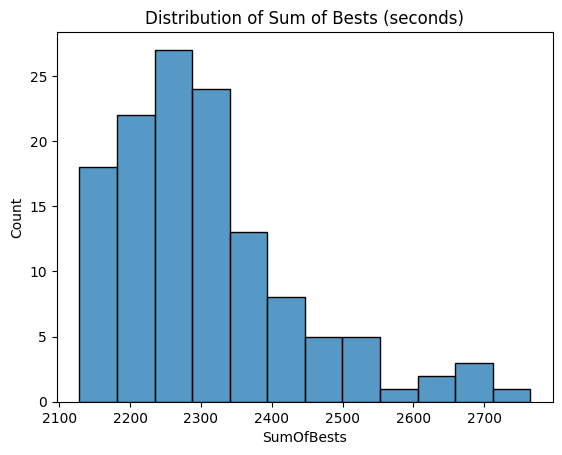

In [73]:
#Showing Sum of Best
sns.histplot(df["SumOfBests"])
plt.title("Distribution of Sum of Bests (seconds)")
plt.show()


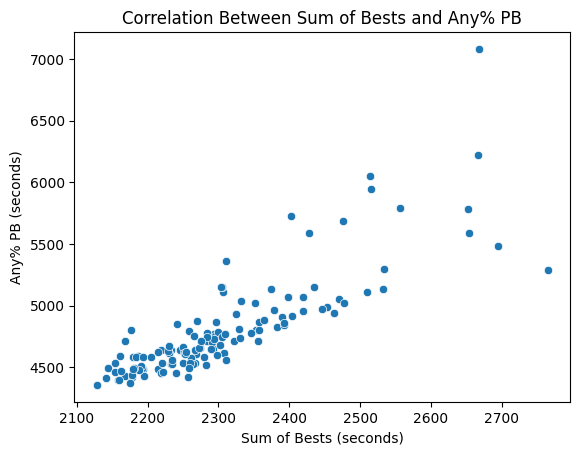

Correlation: 0.833


In [74]:
sns.scatterplot(x="SumOfBests", y="Any%", data=df)
plt.xlabel("Sum of Bests (seconds)")
plt.ylabel("Any% PB (seconds)")
plt.title("Correlation Between Sum of Bests and Any% PB")
plt.show()

# Correlation coefficient
corr = df["SumOfBests"].corr(df["Any%"])
print(f"Correlation: {corr:.3f}")

In [75]:
df.to_csv("cleaned_sms_data.csv", index=False)


In [76]:
#MODEL TRAINING

# Features = all IL columns
X = df[il_cols]

# Target = Any%
y = df["Any%"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50
)

In [78]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
y_pred = model_lr.predict(X_test)

In [87]:
mae_linear = mean_absolute_error(y_test, y_pred)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
r2_linear = r2_score(y_test, y_pred)

print(f"R²:   {r2_linear:.3f}")
print(f"MAE:  {mae_linear:.2f} seconds")
print(f"RMSE: {rmse_linear:.2f} seconds")


R²:   0.580
MAE:  155.47 seconds
RMSE: 245.43 seconds


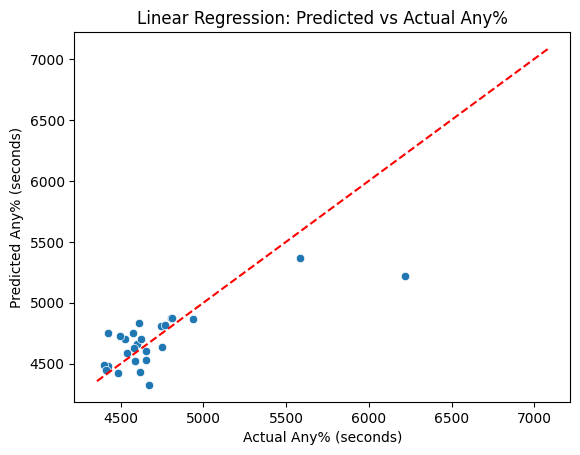

In [88]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Any% (seconds)")
plt.ylabel("Predicted Any% (seconds)")
plt.title("Linear Regression: Predicted vs Actual Any%")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

In [89]:
#tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train
tree = DecisionTreeRegressor(random_state=42, max_depth=None)
tree.fit(X_train, y_train)

# Predict
y_pred_tree = tree.predict(X_test)

# Evaluate
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Results:")
print(f"R²:   {r2_tree:.3f}")
print(f"MAE:  {mae_tree:.2f} seconds")
print(f"RMSE: {rmse_tree:.2f} seconds")



Decision Tree Results:
R²:   0.461
MAE:  183.77 seconds
RMSE: 277.88 seconds


In [90]:
#Train Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # let it grow deep first; you can tune later
    random_state=42
)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mae_forest = mean_absolute_error(y_test, y_pred_rf)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_forest = r2_score(y_test, y_pred_rf)

print(f"Random Forest Results:")
print(f"R²:   {r2_forest:.3f}")
print(f"MAE:  {mae_forest:.2f} seconds")
print(f"RMSE: {rmse_forest:.2f} seconds")


Random Forest Results:
R²:   0.653
MAE:  128.88 seconds
RMSE: 223.03 seconds


In [92]:
#Summary
import pandas as pd

results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R²": [r2_linear, r2_tree, r2_forest],
    "MAE (s)": [mae_linear, mae_tree, mae_forest],  # example numbers
    "RMSE (s)": [rmse_linear, rmse_tree, rmse_forest]  # replace with your actual ones
}

results_df = pd.DataFrame(results)
print(results_df)


               Model        R²     MAE (s)    RMSE (s)
0  Linear Regression  0.579899  155.467790  245.429148
1      Decision Tree  0.461449  183.769231  277.883484
2      Random Forest  0.653067  128.883077  223.034450


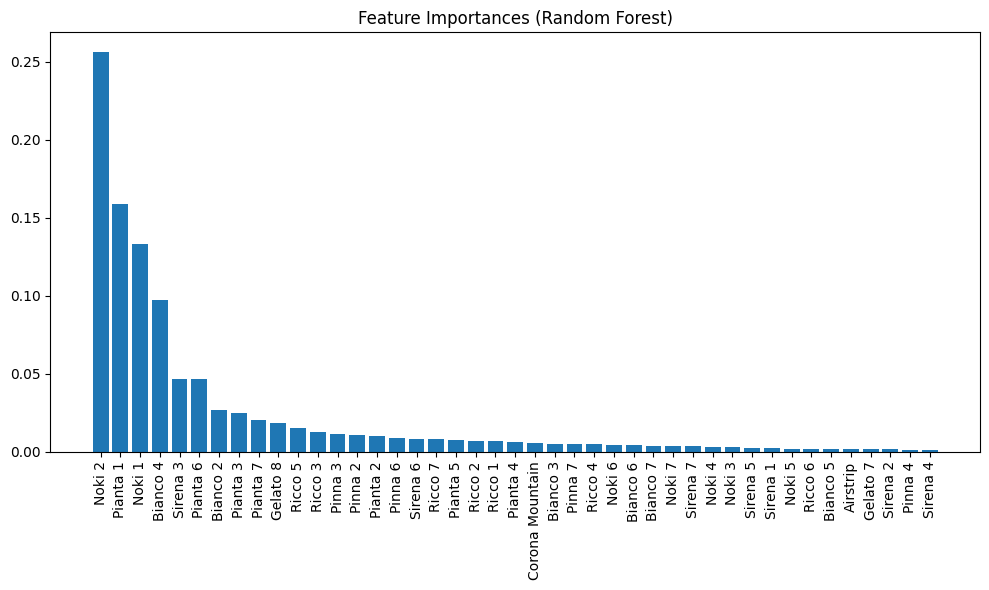

In [93]:
#Individual Level importance from Random Forest
import numpy as np
import matplotlib.pyplot as plt

# Feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(X.columns)[indices], rotation=90)
plt.tight_layout()
plt.show()


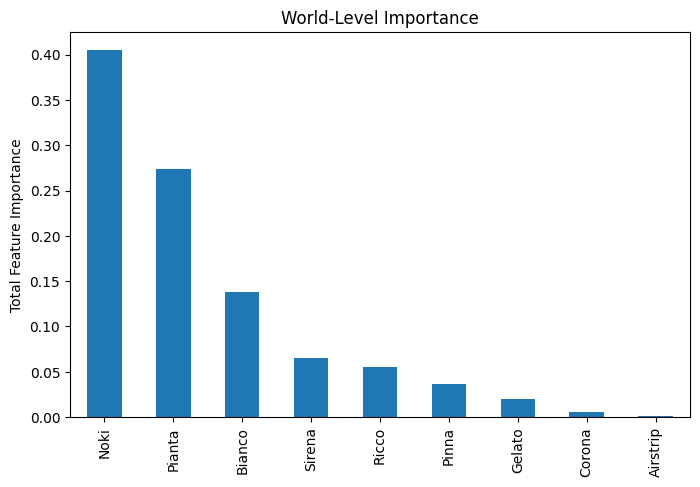

In [94]:
#Individual World Importance from forest model
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Group features by world (e.g., Bianco, Ricco, etc.)
world_importances = feature_importances.groupby(lambda c: c.split()[0]).sum()
world_importances = world_importances.sort_values(ascending=False)

world_importances.plot(kind="bar", figsize=(8, 5), title="World-Level Importance")
plt.ylabel("Total Feature Importance")
plt.show()


Training 100 decision trees on bootstrap samples...
 - Trained 20/100 trees
 - Trained 40/100 trees
 - Trained 60/100 trees
 - Trained 80/100 trees
 - Trained 100/100 trees
Training complete!
Making predictions by averaging tree outputs...

Manual Bagging Performance:
R²:   0.616
MAE:  137.15 seconds
RMSE: 234.66 seconds
Number of Trees: 100


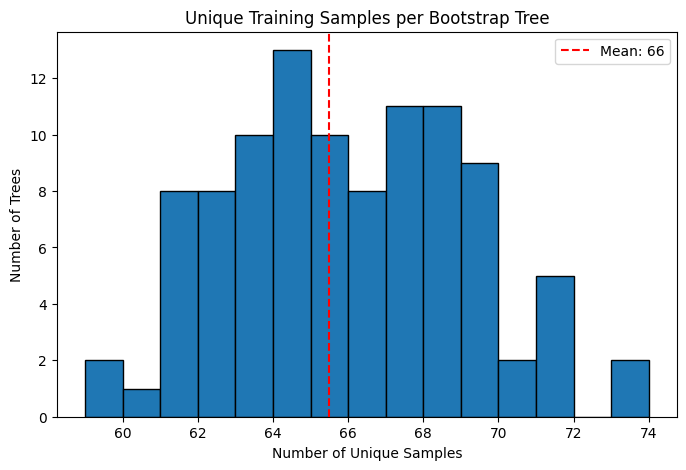

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make sure X_train, X_test, y_train, y_test are already defined from train_test_split

N_ESTIMATORS = 100
bagged_trees = []
unique_sample_counts = []

print(f"Training {N_ESTIMATORS} decision trees on bootstrap samples...")

for i in range(N_ESTIMATORS):
    # number of training samples
    n_samples = X_train.shape[0]

    # indices for this bootstrap sample (WITH replacement)
    bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)

    # if X_train/y_train are DataFrames/Series, use .iloc; if they're numpy arrays, this still works
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    # track how many unique samples this tree saw (for visualization)
    unique_sample_counts.append(len(np.unique(bootstrap_indices)))

    # train a decision tree on this bootstrap sample
    tree = DecisionTreeRegressor(random_state=i)
    tree.fit(X_bootstrap, y_bootstrap)

    bagged_trees.append(tree)

    if (i + 1) % 20 == 0:
        print(f" - Trained {i + 1}/{N_ESTIMATORS} trees")

print("Training complete!")

# ---------- PREDICTION: AVERAGE ALL TREES ----------
print("Making predictions by averaging tree outputs...")

# shape: (n_trees, n_test_samples)
all_predictions = np.array([tree.predict(X_test) for tree in bagged_trees])

# average across trees -> (n_test_samples,)
y_pred_bag = all_predictions.mean(axis=0)

# ---------- EVALUATION ----------
mae_bagging = mean_absolute_error(y_test, y_pred_bag)
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bag))
r2_bagging = r2_score(y_test, y_pred_bag)

print("\nManual Bagging Performance:")
print(f"R²:   {r2_bagging:.3f}")
print(f"MAE:  {mae_bagging:.2f} seconds")
print(f"RMSE: {rmse_bagging:.2f} seconds")
print(f"Number of Trees: {N_ESTIMATORS}")

# ---------- VISUALIZE UNIQUE SAMPLE COUNTS (optional) ----------
plt.figure(figsize=(8, 5))
plt.hist(unique_sample_counts, bins=15, edgecolor='black')
plt.title("Unique Training Samples per Bootstrap Tree")
plt.xlabel("Number of Unique Samples")
plt.ylabel("Number of Trees")
plt.axvline(np.mean(unique_sample_counts), color='red', linestyle='--',
            label=f"Mean: {np.mean(unique_sample_counts):.0f}")
plt.legend()
plt.show()


In [101]:
#Summary
import pandas as pd

results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Bagging"],
    "R²": [r2_linear, r2_tree, r2_forest, r2_bagging],
    "MAE (s)": [mae_linear, mae_tree, mae_forest, mae_bagging], 
    "RMSE (s)": [rmse_linear, rmse_tree, rmse_forest, rmse_bagging]  
}

results_df = pd.DataFrame(results)
print(results_df)

               Model        R²     MAE (s)    RMSE (s)
0  Linear Regression  0.579899  155.467790  245.429148
1      Decision Tree  0.461449  183.769231  277.883484
2      Random Forest  0.653067  128.883077  223.034450
3            Bagging  0.615957  137.150000  234.660158
